In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Loss function을 바꿔보자!
Cross-Entropy 대신 Sum of Squared Error(SSE)로 바꿔서 문제를 푸시면 됩니다.
$$loss(y, \hat{y}) = \sum_{i=1}^{30}-y_i\log\hat{y_i}-(1-y_i)\log(1-\hat{y_i})$$

$$loss(y, \hat{y}) = \sum_{i=1}^{30}|\hat{y_i} - y_i|^2$$

In [2]:
def plot_scatter(W_, xy, labels):
    for k, color in [(0, 'b'), (1, 'r')]:
        idx = labels.flatten() == k
        plt.scatter(xy[idx, 0], xy[idx, 1], c=color)

    x1 = np.linspace(-.1, 1.1)
    x2 = -W_[1] / W_[2] * x1  - W_[0] / W_[2]
    plt.plot(x1, x2, '--k')

    plt.grid()
    plt.show()

In [3]:
W = np.array([-4./5., 3./4., 1.0])

np.random.seed(327)
xy = np.random.rand(30,2)
labels = np.zeros(len(xy))
labels[W[0] + W[1] * xy[:,0] + W[2] * xy[:,1] > 0] = 1

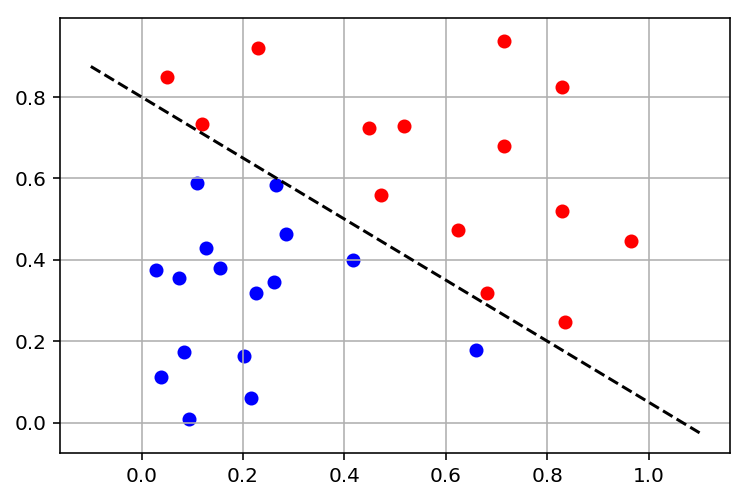

In [4]:
plot_scatter(W, xy, labels)

In [5]:
W0 = np.array([[-0.5, 0.7, 1.8]]).reshape(-1,1)

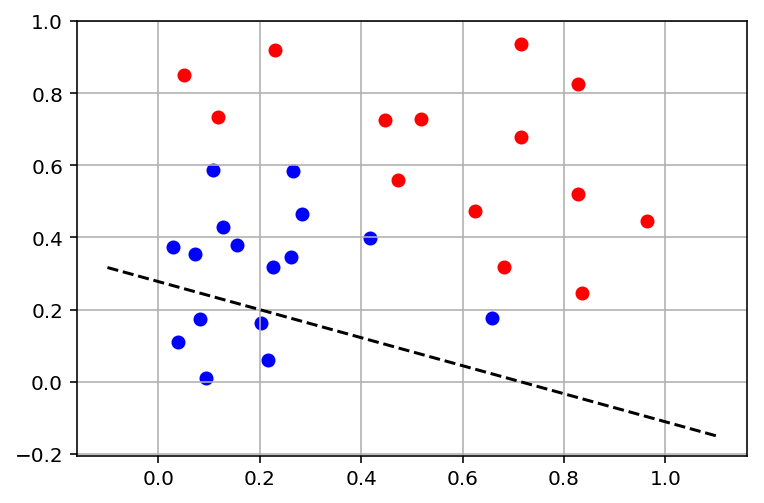

In [6]:
plot_scatter(W0, xy, labels)

In [7]:
features = np.array([[1.0, xval, yval] for xval, yval in xy])
features[:10]

array([[1.        , 0.44795858, 0.72428867],
       [1.        , 0.28380741, 0.46408744],
       [1.        , 0.71479014, 0.67975137],
       [1.        , 0.02897187, 0.3739039 ],
       [1.        , 0.62358144, 0.4734709 ],
       [1.        , 0.51783612, 0.72832152],
       [1.        , 0.26099338, 0.34596232],
       [1.        , 0.83509598, 0.24632146],
       [1.        , 0.68179324, 0.31754929],
       [1.        , 0.20170095, 0.16371035]])

## Gradient Descent

In [8]:
x = tf.placeholder(tf.float64, shape=(None, len(W0)))
y = tf.placeholder(tf.float64, shape=(None, 1))
W = tf.Variable(W0, dtype=tf.float64)

print(x.shape)
print(y.shape)
print(W.shape)

linear_model = tf.sigmoid(tf.matmul(x, W))
# TODO 1
loss = tf.reduce_mean(tf.square(linear_model - y))

lr = 0.1
MaxEpochs= 1000

optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        sess.run(train, feed_dict={x: features, y: labels.reshape(-1,1)})

    curr_W, curr_loss = sess.run([W, loss], feed_dict={x: features, y: labels.reshape(-1,1)})
    print(curr_W.flatten(), curr_loss)
W_gd = curr_W.flatten()

(?, 3)
(?, 1)
(3, 1)
[-2.2423126   2.35902011  2.81444426] 0.10590272153597133


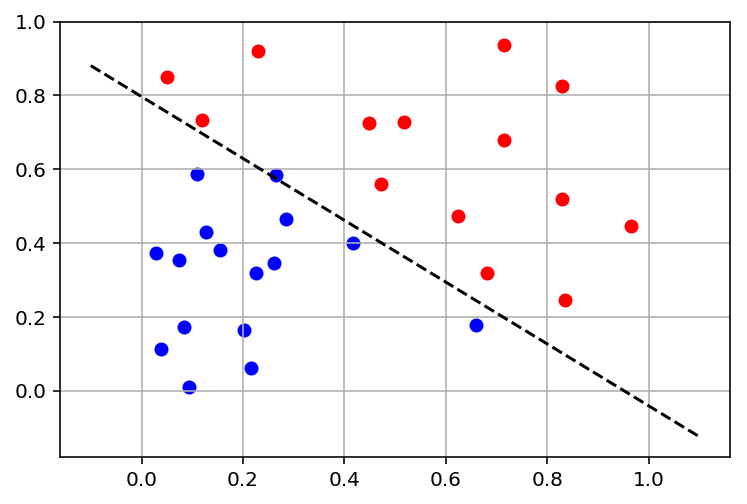

In [9]:
plot_scatter(W_gd, xy, labels)

## Stochastic Gradient Descent

In [10]:
from helper import generate_batches

In [11]:
x = tf.placeholder(tf.float64, shape=(None, len(W0)))
y = tf.placeholder(tf.float64, shape=(None, 1))
W = tf.Variable(W0, dtype=tf.float64)

print(x.shape)
print(y.shape)
print(W.shape)

linear_model = tf.sigmoid(tf.matmul(x, W))
# TODO 2
loss = tf.reduce_mean(tf.square(linear_model - y))

batch_size = 5
lr = 0.1
MaxEpochs= 1000

optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

# TODO 3
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        # TODO 4
        for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
            sess.run(train, feed_dict={x: x_batch, y:y_batch.reshape(-1,1)})
    curr_W, curr_loss = sess.run([W, loss], feed_dict={x: features, y: labels.reshape(-1,1)})
    print(curr_W.flatten(), curr_loss)
W_sgd = curr_W.flatten()

(?, 3)
(?, 1)
(3, 1)
[-4.69039197  4.84205664  5.8206914 ] 0.058750354011522586


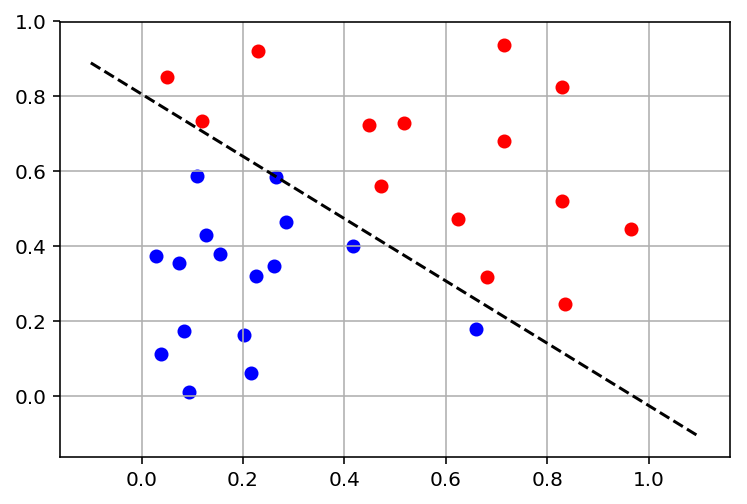

In [12]:
plot_scatter(W_sgd, xy, labels)